In [1]:
# import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt

import scienceplots

plt.style.use(['science', 'grid', 'nature', 'notebook'])

In [2]:
def load_data(path2data):
    with open(path2data, 'r') as f:
        data = f.read()

        # cargo time step
        index_time_step = data.find('time step:')
        index_time_step_end = data.find('\n', index_time_step)
        h = float(data[index_time_step+len('time step:'):index_time_step_end])

        # cargo time_limits:
        index_time_limits = data.find('time limits:')
        index_time_limits_end = data.find('\n', index_time_limits)
        time_limits = data[index_time_limits+len('time limits:'):index_time_limits_end].split(',')
        time_limits = [float(i) for i in time_limits]

        # Cargo estados
        index_start_shape = data.find('shape:')
        index_end_shape = data.find('\n', index_start_shape)
        shape = data[index_start_shape+len('shape:'):index_end_shape].split(',')
        shape = [int(i) for i in shape]

        index_start_n_states = data.find('n_states:')
        index_end_n_states = data.find('\n', index_start_n_states)
        n_states = int(data[index_start_n_states+len('n_states:'):index_end_n_states])

        states = data[index_end_n_states+2:].strip().split('),(')   # separo los estados
        states[-1] = states[-1][:-1]    # saco el ultimo parentesis

        # los paso a numeros complejos de numpy
        res = np.empty(n_states*shape[0]*shape[1], dtype=complex)
        for i, state in enumerate(states):
            state_splited = state.split(',')
            res[i] = complex(float(state_splited[0]), float(state_splited[1]))

        res = res.reshape(n_states, shape[0], shape[1])

        return res, h, time_limits


In [3]:
path2data_00 = '../results/results_bell_00.csv'
path2data_01 = '../results/results_bell_01.csv'
path2data_10 = '../results/results_bell_10.csv'
path2data_11 = '../results/results_bell_11.csv'

path2death_state = '../results/results_standar_death_form.csv'

states_00, h_00, time_limits_00 = load_data(path2data_00)
states_01, h_01, time_limits_01 = load_data(path2data_01)
states_10, h_10, time_limits_10 = load_data(path2data_10)
states_11, h_11, time_limits_11 = load_data(path2data_11)

death_state, h_death, time_limits_death = load_data(path2death_state)

## Estado $|B_{00}\rangle$

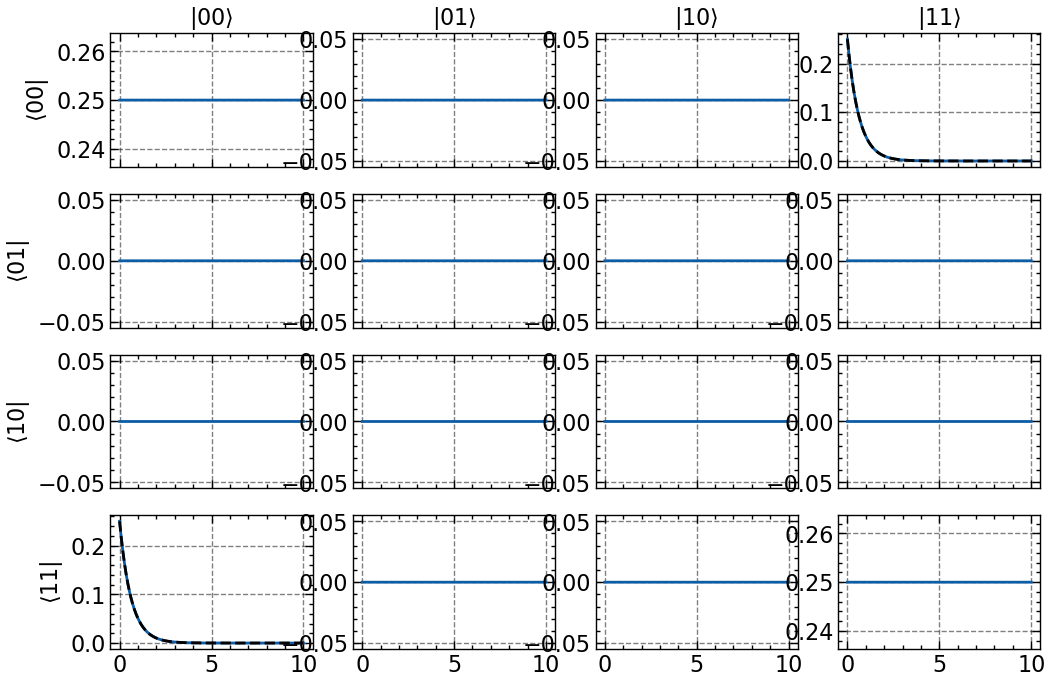

In [4]:
time_axis = np.arange(time_limits_00[0], time_limits_00[1]+h_00, h_00)

p03 = lambda t, p03_0, gamma_phi: p03_0**2 * np.exp(-16*gamma_phi*t) 

gamma_phi = 0.1


# Imprimo los resultados
fig, ax = plt.subplots(4, 4, figsize=(12, 8), sharex=True)

colums = [r'$|00\rangle$', r'$|01\rangle$', r'$|10\rangle$', r'$|11\rangle$']
rows = [r'$\langle 00|$', r'$\langle 01|$', r'$\langle 10|$', r'$\langle 11|$']

for i in range(4):
    for j in range(4):
        ax[i, j].plot(time_axis, np.abs(states_00[:, i, j])**2)
        if i == 0:
            ax[i, j].set_title(colums[j])
            if j == 3:
                p03_0 = np.abs(states_00[0, 0, 3])
                ax[i, j].plot(time_axis, p03(time_axis, p03_0, gamma_phi), '--', color='black')

        if j == 0:
            ax[i, j].set_ylabel(rows[i])
            if i == 3:
                p03_0 = np.abs(states_00[0, 3, 0])
                ax[i, j].plot(time_axis, p03(time_axis, p03_0, gamma_phi), '--', color='black')

## Estado $|B_{01}\rangle$

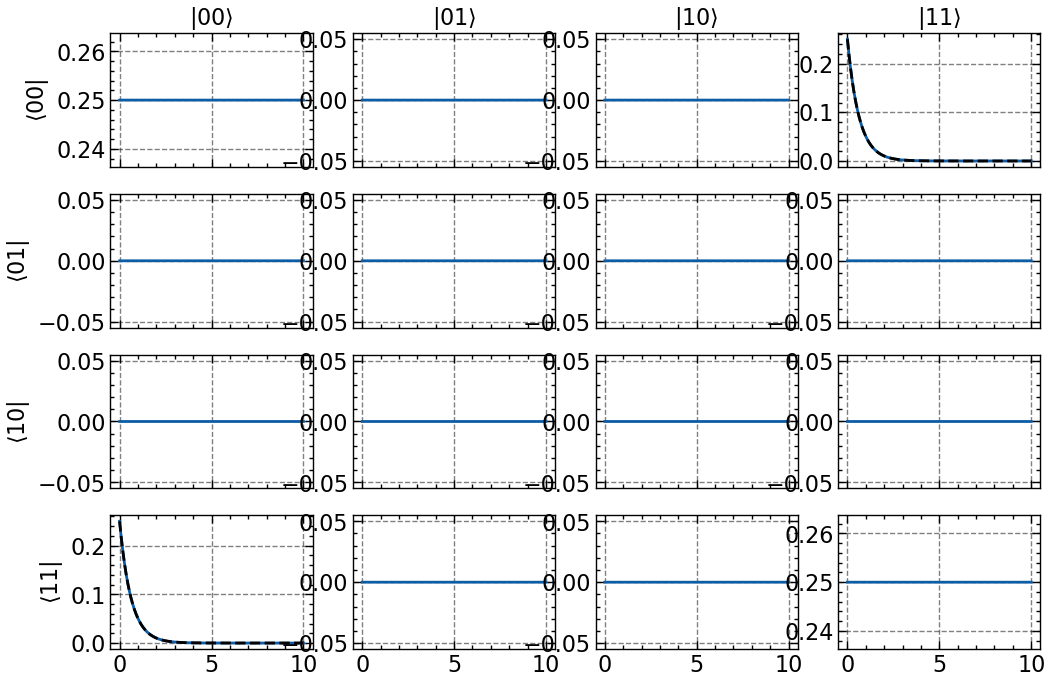

In [5]:
time_axis = np.arange(time_limits_01[0], time_limits_01[1]+h_01, h_01)

p03 = lambda t, p03_0, gamma_phi: p03_0**2 * np.exp(-16*gamma_phi*t) 

gamma_phi = 0.1


# Imprimo los resultados
fig, ax = plt.subplots(4, 4, figsize=(12, 8), sharex=True)

colums = [r'$|00\rangle$', r'$|01\rangle$', r'$|10\rangle$', r'$|11\rangle$']
rows = [r'$\langle 00|$', r'$\langle 01|$', r'$\langle 10|$', r'$\langle 11|$']

for i in range(4):
    for j in range(4):
        ax[i, j].plot(time_axis, np.abs(states_01[:, i, j])**2)
        if i == 0:
            ax[i, j].set_title(colums[j])
            if j == 3:
                p03_0 = np.abs(states_00[0, 0, 3])
                ax[i, j].plot(time_axis, p03(time_axis, p03_0, gamma_phi), '--', color='black')

        if j == 0:
            ax[i, j].set_ylabel(rows[i])
            if i == 3:
                p03_0 = np.abs(states_00[0, 3, 0])
                ax[i, j].plot(time_axis, p03(time_axis, p03_0, gamma_phi), '--', color='black')

## Esdtado $|B_{10}\rangle$

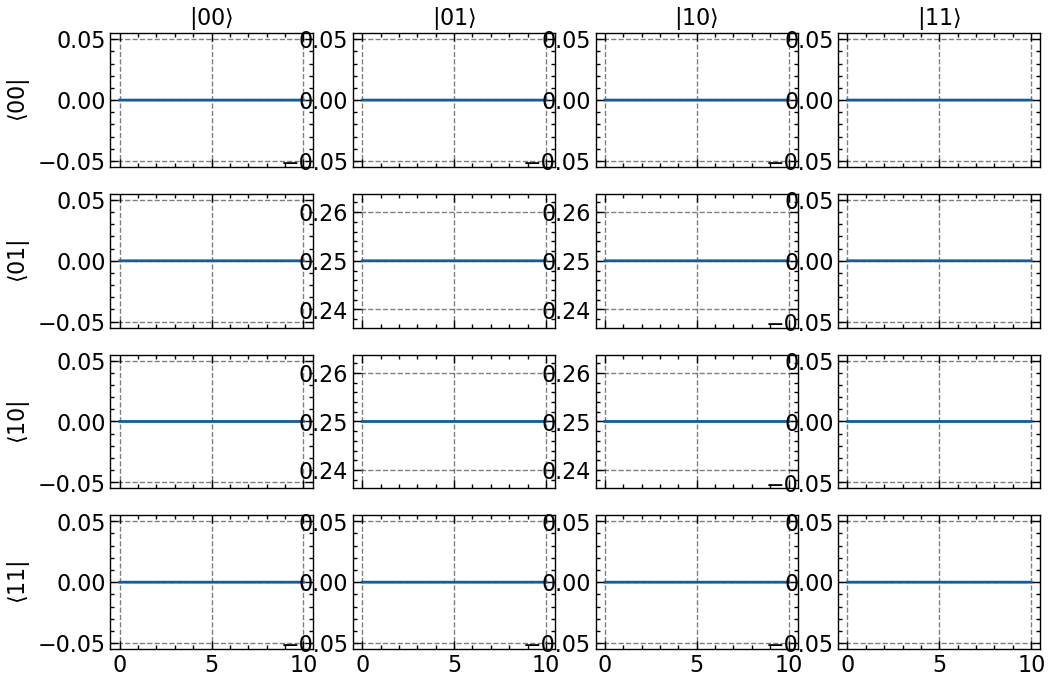

In [6]:
time_axis = np.arange(time_limits_10[0], time_limits_10[1]+h_10, h_10)

gamma_phi = 0.1


# Imprimo los resultados
fig, ax = plt.subplots(4, 4, figsize=(12, 8), sharex=True)

colums = [r'$|00\rangle$', r'$|01\rangle$', r'$|10\rangle$', r'$|11\rangle$']
rows = [r'$\langle 00|$', r'$\langle 01|$', r'$\langle 10|$', r'$\langle 11|$']

for i in range(4):
    for j in range(4):
        ax[i, j].plot(time_axis, np.abs(states_10[:, i, j])**2)
        if i == 0:
            ax[i, j].set_title(colums[j])
        if j == 0:
            ax[i, j].set_ylabel(rows[i])

## Estado $|B_{11}\rangle$

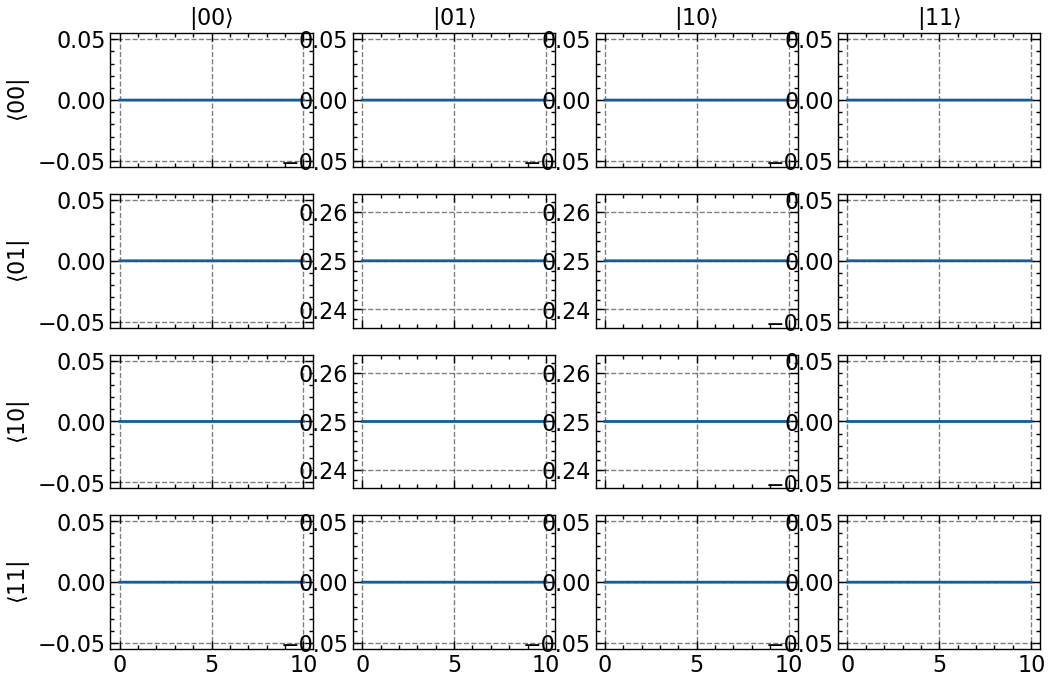

In [7]:
time_axis = np.arange(time_limits_11[0], time_limits_11[1]+h_11, h_11)

gamma_phi = 0.1


# Imprimo los resultados
fig, ax = plt.subplots(4, 4, figsize=(12, 8), sharex=True)

colums = [r'$|00\rangle$', r'$|01\rangle$', r'$|10\rangle$', r'$|11\rangle$']
rows = [r'$\langle 00|$', r'$\langle 01|$', r'$\langle 10|$', r'$\langle 11|$']

for i in range(4):
    for j in range(4):
        ax[i, j].plot(time_axis, np.abs(states_11[:, i, j])**2)
        if i == 0:
            ax[i, j].set_title(colums[j])
        if j == 0:
            ax[i, j].set_ylabel(rows[i])

## Concurrencias

In [8]:
def coc(state):
    sys = qt.tensor(qt.sigmay(), qt.sigmay())
    state_q = qt.Qobj(state, dims=[[2, 2], [2, 2]])

    R = state_q * sys * state_q.dag() * sys

    eigvals = R.eigenenergies()

    eigvals = abs(np.sort(eigvals))

    return np.max([0, 0.5*(eigvals[-1] - eigvals[-2] - eigvals[-3] - eigvals[-4])])

def concurrence(states):
    return np.array([qt.concurrence(qt.Qobj(s, dims=[[2, 2], [2, 2]])) for s in states])
    # sys = qt.tensor(qt.sigmay(), qt.sigmay())

    # states_q = [qt.Qobj(s, dims=[[2, 2], [2, 2]]) for s in states]

    # matrices = [s * sys * s.dag() * sys for s in states_q]

    # eigvals = [m.eigenenergies() for m in matrices]

    # # ordeno los autovalores
    # eigvals = abs(np.sort(eigvals, axis=1))

    # return np.max([0, 0.5*(eigvals[:, -1] - eigvals[:, -2] - eigvals[:, -3] - eigvals[:, -4])], axis=1)



# conc_an = lambda t, args: 2* np.max([0, np.abs(args['p03_0'])**2 * np.exp(-16*args['gamma_phi']*t) - np.sqrt(args['b']*args['c'])])

def conc_ac (t, w_t, z_t, args):
    a = args['a']
    b = args['b']
    c = args['c']
    d = args['d']

    return 2 * np.max([0, np.sqrt(w_t(t, args)) - np.sqrt(b*c), np.sqrt(z_t(t, args)) - np.sqrt(a*d)])

    # lamb_1 = a*d + 2*np.sqrt(a*d*w_t(t, args)) + w_t(t, args)
    # lamb_2 = a*d - 2*np.sqrt(a*d*w_t(t, args)) + w_t(t, args)
    # lamb_3 = b*c + 2*np.sqrt(b*c*z_t(t, args)) + z_t(t, args)
    # lamb_4 = b*c - 2*np.sqrt(b*c*z_t(t, args)) + z_t(t, args)

    # # lamb_1 = a + d + np.sqrt((a-d)**2 + 4*w_t(t, args))
    # # lamb_2 = a + d - np.sqrt((a-d)**2 + 4*w_t(t, args))
    # # lamb_3 = b + c + np.sqrt((b-c)**2 + 4*z_t(t, args))
    # # lamb_4 = b + c - np.sqrt((b-c)**2 + 4*z_t(t, args))

    # print(lamb_1, lamb_2, lamb_3, lamb_4)

    # lambds_sorted = np.sqrt(abs(np.sort([lamb_1, lamb_2, lamb_3, lamb_4])))

    # return np.max([0, (lambds_sorted[-1] - lambds_sorted[-2] - lambds_sorted[-3] - lambds_sorted[-4])])

In [9]:
conc_00 = concurrence(states_00)
conc_01 = concurrence(states_01)
conc_10 = concurrence(states_10)
conc_11 = concurrence(states_11)
conc_death = concurrence(death_state)

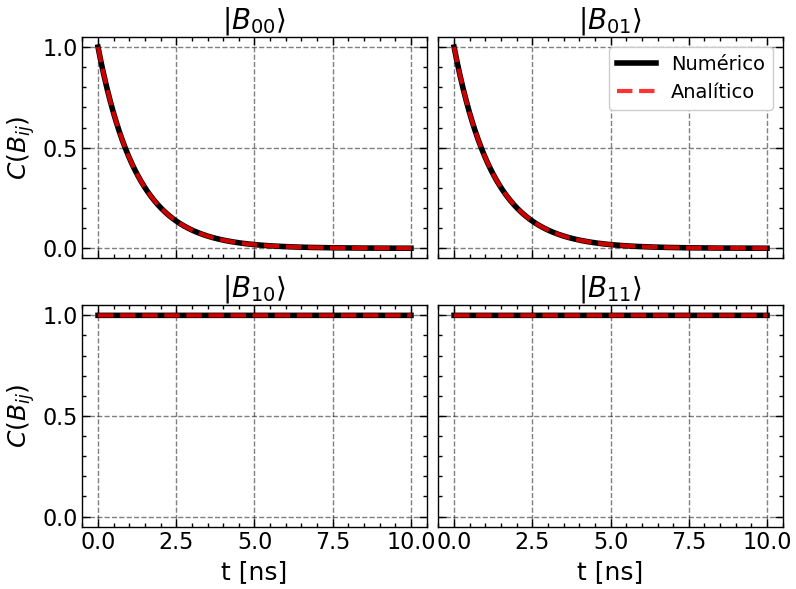

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(8, 6), sharex=True, sharey=True)
lw_m = 4
lw_s = 3
alph = 0.8
fst = 20
fsl = 18

w_t = lambda t, args: np.abs(args['p03_0'])**2 * np.exp(-16*args['gamma_phi']*t)
z_t = lambda t, args: 0

args_00 = {'a': states_00[0,0,0].real, 'b':states_00[0,1,1].real, 'c':states_00[0,2,2].real, 'd':states_00[0,3,3].real, 'p03_0': np.abs(states_00[0, 0, 3]), 'gamma_phi': gamma_phi}
args_01 = {'a': states_01[0,0,0].real, 'b':states_01[0,1,1].real, 'c':states_01[0,2,2].real, 'd':states_01[0,3,3].real, 'p03_0': np.abs(states_01[0, 0, 3]), 'gamma_phi': gamma_phi}
args_10 = {'a': states_10[0,0,0].real, 'b':states_10[0,1,1].real, 'c':states_10[0,2,2].real, 'd':states_10[0,3,3].real, 'p03_0': np.abs(states_10[0, 0, 3]), 'gamma_phi': gamma_phi}
args_11 = {'a': states_11[0,0,0].real, 'b':states_11[0,1,1].real, 'c':states_11[0,2,2].real, 'd':states_11[0,3,3].real, 'p03_0': np.abs(states_11[0, 0, 3]), 'gamma_phi': gamma_phi}

conc_an_00 = np.array([conc_ac(t, w_t, z_t, args_00) for t in time_axis])
conc_an_01 = np.array([conc_ac(t, w_t, z_t, args_01) for t in time_axis])
conc_an_10 = np.array([conc_ac(t, w_t, lambda t, args: np.abs(states_10[0,1,2])**2, args_10) for t in time_axis])
conc_an_11 = np.array([conc_ac(t, w_t, lambda t, args: np.abs(states_11[0,1,2])**2, args_11) for t in time_axis])

ax[0, 0].plot(time_axis, conc_00, color='black', lw=lw_m)
ax[0, 0].plot(time_axis, conc_an_00, '--', color='red', lw=lw_s, alpha=alph)
# ax[0, 0].axvline(x=1/(16*gamma_phi), color='black', linestyle='--')
ax[0, 0].set_title(r'$|B_{00}\rangle$', fontsize=fst)
ax[0, 0].set_ylabel(r'$C(B_{ij})$', fontsize=fsl)

ax[0, 1].plot(time_axis, conc_01, color='black', lw=lw_m, label='Numérico')
ax[0, 1].plot(time_axis, conc_an_01, '--', color='red', lw=lw_s, alpha=alph, label = 'Analítico')
ax[0, 1].set_title(r'$|B_{01}\rangle$', fontsize=fst)
ax[0, 1 ].legend(fontsize=14)

ax[1, 0].plot(time_axis, conc_10, color='black', lw=lw_m)
ax[1, 0].plot(time_axis, conc_an_10, '--', color='red', lw=lw_s, alpha=alph)
ax[1, 0].set_title(r'$|B_{10}\rangle$', fontsize=fst)
ax[1, 0].set_ylabel(r'$C(B_{ij})$', fontsize=fsl)
ax[1, 0].set_xlabel('t [ns]', fontsize=fsl)

ax[1, 1].plot(time_axis, conc_11, color='black', lw=lw_m)
ax[1, 1].plot(time_axis, conc_an_11, '--', color='red', lw=lw_s, alpha=alph)
ax[1, 1].set_title(r'$|B_{11}\rangle$', fontsize=fst)
ax[1, 1].set_xlabel('t [ns]', fontsize=fsl)

plt.tight_layout()
plt.savefig('../doc/figures/concurrence_bell_states.pdf', dpi=500)


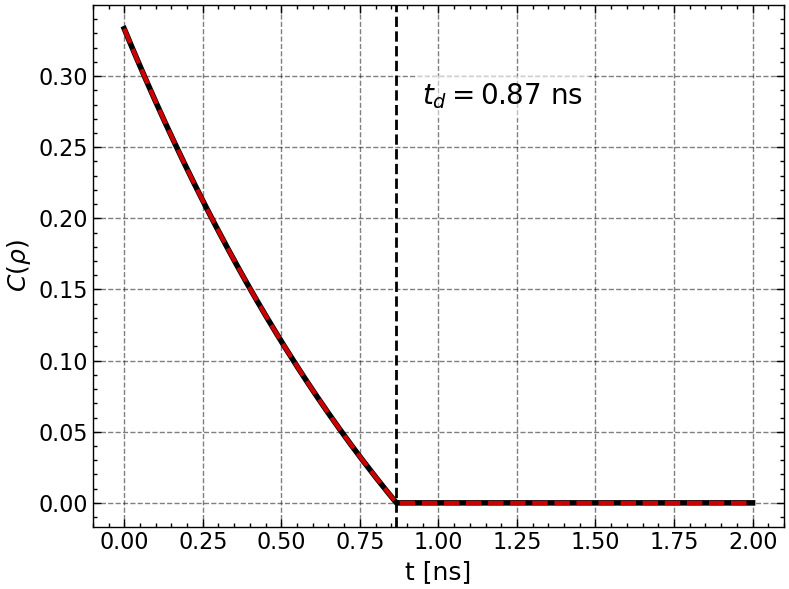

In [29]:
time_axis_death = np.arange(time_limits_death[0], time_limits_death[1]+h_death, h_death)

args_death = {'a': death_state[0,0,0].real, 'b':death_state[0,1,1].real, 'c':death_state[0,2,2].real, 'd':death_state[0,3,3].real, 'p03_0': np.abs(death_state[0, 0, 3]), 'gamma_phi': gamma_phi}

conc_an_death = np.array([conc_ac(t, w_t, z_t, args_death) for t in time_axis_death])

t_death = - np.log(np.sqrt(args_death['b']*args_death['c'])/np.abs(args_death['p03_0']))/(8*gamma_phi)

epsilon = 0.08

plt.plot(time_axis_death, conc_death, color='black', lw=lw_m)
plt.plot(time_axis_death, conc_an_death, '--', color='red', lw=lw_s, alpha=alph)
plt.axvline(x=t_death, color='black', linestyle='--')
plt.text(t_death+epsilon, 0.28, f'$t_{{d}} = {t_death:.2f}$ ns', fontsize=20, color='black', bbox=dict(facecolor='white', alpha=0.5, edgecolor='white'))
plt.xlabel('t [ns]', fontsize=fsl)
plt.ylabel(r'$C(\rho)$', fontsize=fsl)

plt.tight_layout()
plt.savefig('../doc/figures/concurrence_death_state.pdf', dpi=500)

# plt.xlim([0, 2])